# TCC MBA USP/ESALQ: Comparativo de métodos de Feature selection para otimização de modelos de Machine Learning supervisionados

# Importação de bibliotecas

In [ ]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Módulos do scikit-learn para seleção de features, modelos e avaliação de modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Biblioteca para vizualização de dados
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Carga do banco de dados e análise exploratória das variáveis

In [2]:
# Carregando o dataset em um dataframe do Pandas
df = pd.read_csv('./data/breast_cancer_data.csv', delimiter=",")

# Printando os tipos de dados e estatísticas descritivas das variáveis
print(df.dtypes)
df.describe(include='all')

ID                             int64
DIAGNOSTICO                   object
RAIO_MEDIA                   float64
TEXTURA_MEDIA                float64
PERIMETRO_MEDIA              float64
AREA_MEDIA                   float64
SUAVIDADE_MEDIA              float64
DENSIDADE_MEDIA              float64
CONCAVIDADE_MEDIA            float64
PONTOS_CONCAVOS_MEDIA        float64
SIMETRIA_MEDIA               float64
DIMENSAO_FRACIONADA_MEDIA    float64
RAIO_EP                      float64
TEXTURA_EP                   float64
PERIMETRO_EP                 float64
AREA_EP                      float64
SUAVIDADE_EP                 float64
DENSIDADE_EP                 float64
CONCAVIDADE_EP               float64
PONTOS_CONCAVOS_EP           float64
SIMETRIA_EP                  float64
DIMENSAO_FRACIONADA_EP       float64
RAIO_PIOR                    float64
TEXTURA_PIOR                 float64
PERIMETRO_PIOR               float64
AREA_PIOR                    float64
SUAVIDADE_PIOR               float64
D

,ID,DIAGNOSTICO,RAIO_MEDIA,TEXTURA_MEDIA,PERIMETRO_MEDIA,AREA_MEDIA,SUAVIDADE_MEDIA,DENSIDADE_MEDIA,CONCAVIDADE_MEDIA,PONTOS_CONCAVOS_MEDIA,...,RAIO_PIOR,TEXTURA_PIOR,PERIMETRO_PIOR,AREA_PIOR,SUAVIDADE_PIOR,DENSIDADE_PIOR,CONCAVIDADE_PIOR,PONTOS_CONCAVOS_PIOR,SIMETRIA_PIOR,DIMENSAO_FRACIONADA_PIOR
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [3]:
# Pré-visualização do dataset
df.head()

,ID,DIAGNOSTICO,RAIO_MEDIA,TEXTURA_MEDIA,PERIMETRO_MEDIA,AREA_MEDIA,SUAVIDADE_MEDIA,DENSIDADE_MEDIA,CONCAVIDADE_MEDIA,PONTOS_CONCAVOS_MEDIA,...,RAIO_PIOR,TEXTURA_PIOR,PERIMETRO_PIOR,AREA_PIOR,SUAVIDADE_PIOR,DENSIDADE_PIOR,CONCAVIDADE_PIOR,PONTOS_CONCAVOS_PIOR,SIMETRIA_PIOR,DIMENSAO_FRACIONADA_PIOR
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Pré-processamento de variáveis

In [4]:
# Checando valores nulos
df.isna().sum()

ID                           0
DIAGNOSTICO                  0
RAIO_MEDIA                   0
TEXTURA_MEDIA                0
PERIMETRO_MEDIA              0
AREA_MEDIA                   0
SUAVIDADE_MEDIA              0
DENSIDADE_MEDIA              0
CONCAVIDADE_MEDIA            0
PONTOS_CONCAVOS_MEDIA        0
SIMETRIA_MEDIA               0
DIMENSAO_FRACIONADA_MEDIA    0
RAIO_EP                      0
TEXTURA_EP                   0
PERIMETRO_EP                 0
AREA_EP                      0
SUAVIDADE_EP                 0
DENSIDADE_EP                 0
CONCAVIDADE_EP               0
PONTOS_CONCAVOS_EP           0
SIMETRIA_EP                  0
DIMENSAO_FRACIONADA_EP       0
RAIO_PIOR                    0
TEXTURA_PIOR                 0
PERIMETRO_PIOR               0
AREA_PIOR                    0
SUAVIDADE_PIOR               0
DENSIDADE_PIOR               0
CONCAVIDADE_PIOR             0
PONTOS_CONCAVOS_PIOR         0
SIMETRIA_PIOR                0
DIMENSAO_FRACIONADA_PIOR     0
dtype: i

In [5]:
# Removendo a coluna ID
coluna_drop = ['ID']
df.drop(coluna_drop, axis=1, inplace=True)

# Checando a retirada da coluna ID
df.head()

,DIAGNOSTICO,RAIO_MEDIA,TEXTURA_MEDIA,PERIMETRO_MEDIA,AREA_MEDIA,SUAVIDADE_MEDIA,DENSIDADE_MEDIA,CONCAVIDADE_MEDIA,PONTOS_CONCAVOS_MEDIA,SIMETRIA_MEDIA,...,RAIO_PIOR,TEXTURA_PIOR,PERIMETRO_PIOR,AREA_PIOR,SUAVIDADE_PIOR,DENSIDADE_PIOR,CONCAVIDADE_PIOR,PONTOS_CONCAVOS_PIOR,SIMETRIA_PIOR,DIMENSAO_FRACIONADA_PIOR
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Encode da variável target para números inteiros binários. Evento (classe M - Maligna) = 1 e Não evento (classe B - Benigna) = 0
df["DIAGNOSTICO_INT"] = (df["DIAGNOSTICO"] == 'M').astype('int')

# Retirando a coluna categórica
df.drop(['DIAGNOSTICO'], axis=1, inplace=True)

# Checando a nova coluna criada
df.head()

,RAIO_MEDIA,TEXTURA_MEDIA,PERIMETRO_MEDIA,AREA_MEDIA,SUAVIDADE_MEDIA,DENSIDADE_MEDIA,CONCAVIDADE_MEDIA,PONTOS_CONCAVOS_MEDIA,SIMETRIA_MEDIA,DIMENSAO_FRACIONADA_MEDIA,...,TEXTURA_PIOR,PERIMETRO_PIOR,AREA_PIOR,SUAVIDADE_PIOR,DENSIDADE_PIOR,CONCAVIDADE_PIOR,PONTOS_CONCAVOS_PIOR,SIMETRIA_PIOR,DIMENSAO_FRACIONADA_PIOR,DIAGNOSTICO_INT
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Principais métricas de desempenho

Para este estudo de caso será utilizado os módulos da biblioteca `SCIKIT-LEARNING` e modelos, como um Random Forest, para comparar as principais métricas de desempenho de um modelo utilizando as pricipais técnicas de Feature Selection. As métricas são: Acurácia, área sob a curva ROC, precisão, Recall e f1-score. Também será utilizado as funções de Feature Selection do scikit-learning.

## Separação do banco de dados em variáveis preditoras e depedente

In [7]:
# Separação do dataset em variáveis preditoras e variável dependente (DIAGNOSTICO_INT).
X = df.drop("DIAGNOSTICO_INT", 1)   # Variáveis preditoras
Y = df["DIAGNOSTICO_INT"]   # Variável dependente

## Funções de treinamento de modelos e cálculo das principais métricas de desempenho

A criação das funções abaixo facilitará o desenvolvimento dos códigos e aplicação das técnicas de Feature Selection do estudo de caso.

In [8]:
# Função de treinamento do modelo Random Forest.

def fit_model(X, Y):
    
    # 1º: Definição do modelo e parâmetros de treinamento
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # 2º: Treinamento do modelo através do método fit
    model.fit(X, Y)
    
    return model

In [9]:
# Função de cálculo das métricas de desempenho do modelo. Um dos parâmetros dessa função é o output da função acima. 

def calculate_metrics(model, X_test_scaled, Y_test):
    
    # 1º: Obtendo os valores preditos para cálculo das métricas de desempenho
    y_predict_r = model.predict(X_test_scaled)
    
    # 2º: Cálculo das métricas de desempenho.
    acc = accuracy_score(Y_test, y_predict_r)  # Acurácia
    roc = roc_auc_score(Y_test, y_predict_r)  # Área sob a curva ROC
    prec = precision_score(Y_test, y_predict_r)  # Precisão
    rec = recall_score(Y_test, y_predict_r)  # Recall
    f1 = f1_score(Y_test, y_predict_r)  # f1-score
    
    return acc, roc, prec, rec, f1

In [10]:
# Função para treino e obtenção das métricas do modelo.

def train_and_get_metrics(X, Y):
    
    # 1º: Separação do dataset em conjunto de treino e teste. 20% do dataset é destinado para teste (test_size).
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    ''' 2º: Normalizar as variáveis preditoras de treino e teste. OBS.: Não é necessário a normalização, pois já estão 
    codificadas em 0 e 1 '''
    
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3º: Treinar o modelo
    model = fit_model(X_train_scaled, Y_train)

    # 4º: Calcular as métricas de desempenho. 
    acc, roc, prec, rec, f1 = calculate_metrics(model, X_test_scaled, Y_test)

    return acc, roc, prec, rec, f1

In [11]:
# Função de avaliação do modelo com a consolidação de todas as métricas.

def evaluate_model_on_features(X, Y):
    
    # 1º: Treina e calcula as métricas do modelo
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)

    # 2º: Constrói uma tabela com todas as métricas do modelo
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Acurácia", "AUC", "Precisão", "Recall", "F1 Score", 'Qtde variáveis'])
    
    return display_df

## Cálculo das métricas considerando todas as variáveis preditoras

O cálculo das métricas considerando todas as variáveis preditoras é exposto na tabela gerada abaixo. Essas métricas será o baseline e obtidas sem nenhum tipo de método de Feature Selection.

In [12]:
# Calculando as métricas com todas as variáveis
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['Todas as variáveis']

# Guardando os resultados no objeto "results"
results = all_features_eval_df

# Exibindo os resultados
results.head()

,Acurácia,AUC,Precisão,Recall,F1 Score,Qtde variáveis
Todas as variáveis,0.964912,0.967262,0.931818,0.97619,0.953488,30


# Métodos de seleção de variáveis (*Feature Selection*)

Existem 3 categorias de seleção de variáveis, sendo elas:

* *Filter methods*;
* *wrapper methods*;
* *Embedded methods* (ou *Instrinsic*).

## *Filter Methods*

***Filter methods*** são uma das técnicas de seleção de variáveis em que as variáveis preditoras são selecionadas com base em sua capacidade de classificar ou correlacionar com a variável dependente.

### *ANOVA F-Test*

Para esse estudo de caso, como as variáveis preditoras são numéricas e a dependente, categórica, utilizaremos o método ANOVA F-teste. Será utilizada a função *`SelectKBest()`* para selecionar as melhores variáveis que o método *`f_classif`* gera como output, o *ANOVA F-Test*.

In [13]:
def univariate_selection():
    
    # 1º: Separar os conjunto de treino e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # 2º: Fazer a normalização das variáveis preditoras
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 3º: Geração do objeto com as funções de seleção de variáveis. Seleção das 20 melhores variáveis.
    selector = SelectKBest(f_classif, k=20)
    
    # 4º: Ajustando o seletor com os dados de treinamento
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    
    # 5º: Exibindo os resultados
    feature_idx = selector.get_support()
    for name, included in zip(df.drop("DIAGNOSTICO_INT",1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Retirando a variável dependente
    feature_names = df.drop("DIAGNOSTICO_INT",1 ).columns[feature_idx]
    
    return feature_names

In [14]:
#Exibindo as 20 melhores variáveis:

univariate_feature_names = univariate_selection()

RAIO_MEDIA: True
TEXTURA_MEDIA: True
PERIMETRO_MEDIA: True
AREA_MEDIA: True
SUAVIDADE_MEDIA: False
DENSIDADE_MEDIA: True
CONCAVIDADE_MEDIA: True
PONTOS_CONCAVOS_MEDIA: True
SIMETRIA_MEDIA: False
DIMENSAO_FRACIONADA_MEDIA: False
RAIO_EP: True
TEXTURA_EP: False
PERIMETRO_EP: True
AREA_EP: True
SUAVIDADE_EP: False
DENSIDADE_EP: False
CONCAVIDADE_EP: False
PONTOS_CONCAVOS_EP: True
SIMETRIA_EP: False
DIMENSAO_FRACIONADA_EP: False
RAIO_PIOR: True
TEXTURA_PIOR: True
PERIMETRO_PIOR: True
AREA_PIOR: True
SUAVIDADE_PIOR: True
DENSIDADE_PIOR: True
CONCAVIDADE_PIOR: True
PONTOS_CONCAVOS_PIOR: True
SIMETRIA_PIOR: True
DIMENSAO_FRACIONADA_PIOR: False


In [15]:
# Calculando as métricas do modelo com as variáveis escolhidas pelo método ANOVA F-Test
univariate_eval_df = evaluate_model_on_features(df[univariate_feature_names], Y)
univariate_eval_df.index = ['Filter Methods: ANOVA F-test']

# Acrescentando as métricas provenientes do método ANOVA F-test
results = results.append(univariate_eval_df)
results.head(n=10)

,Acurácia,AUC,Precisão,Recall,F1 Score,Qtde variáveis
Todas as variáveis,0.964912,0.967262,0.931818,0.97619,0.953488,30
Filter Methods: ANOVA F-test,0.973684,0.974206,0.953488,0.97619,0.964706,20


## *Wrapper Methods*

***Wrapper methods*** são métodos selecionam as variáveis com base na performance de um modelo específico. Eles criam vários modelos usando diferentes subconjuntos de variáveis e selecionam aquele com melhor desempenho.

### *Recursive Feature Elimination*

Será utilizada a função `RFE` para a eliminação das variáveis que colaboram menos desempenho ao modelo.

In [16]:
def run_rfe():
    
    # 1º: Separa o conjunto de treino e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # 2º: Fazer a normalização das variáveis preditoras
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3º: Definição do modelo
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # 4º: Exucutar a função RFE com 15 variáveis
    rfe = RFE(model, 15)
    
    # 5º: Ajustando o RFE
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = df.drop("DIAGNOSTICO_INT",1 ).columns[rfe.get_support()]
    
    return feature_names

rfe_feature_names = run_rfe()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [17]:
# Calculando as métricas do modelo com as variáveis escolhidas pelo método RFE
rfe_eval_df = evaluate_model_on_features(df[rfe_feature_names], Y)
rfe_eval_df.index = ['Wrapper methods: RFE']

# Acrescentando as métricas provenientes do método RFE
results = results.append(rfe_eval_df)
results.head(n=10)

,Acurácia,AUC,Precisão,Recall,F1 Score,Qtde variáveis
Todas as variáveis,0.964912,0.967262,0.931818,0.97619,0.953488,30
Filter Methods: ANOVA F-test,0.973684,0.974206,0.953488,0.97619,0.964706,20
Wrapper methods: RFE,0.964912,0.967262,0.931818,0.97619,0.953488,15


## *Embedded Methods*

***Embedded Methods*** são aqueles que selecionam variáveis incorporando a seleção de variáveis no processo de treinamento do modelo.

### *Feature Importances*

A **importância da variável** já está incorporada nos modelos baseados em árvore do *scikit-learn* , como *RandomForestClassifier*. Depois que o modelo é ajustado, a importância do recurso fica disponível como uma propriedade chamada *feature_importances_*.

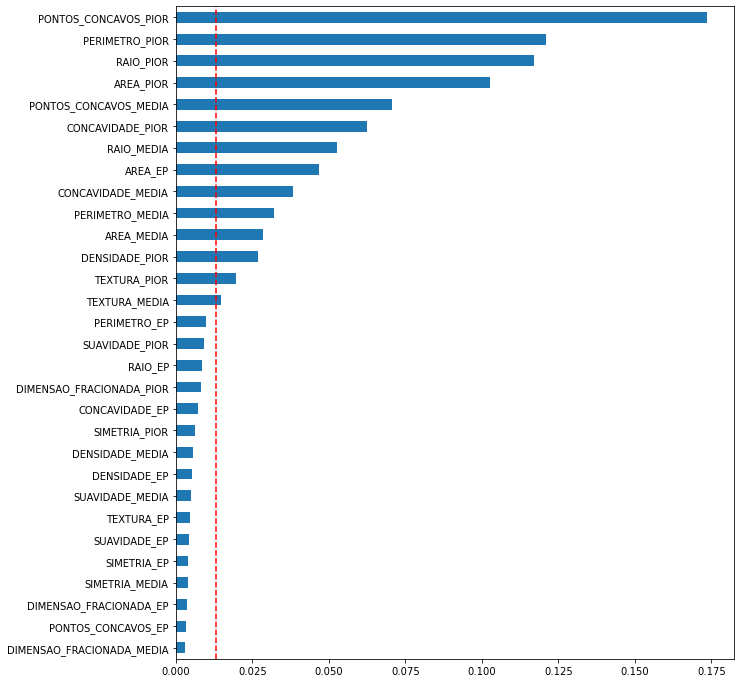

In [18]:
def feature_importances_from_tree_based_model_():
    
    # 1º: Separa o conjunto de treino e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # 2º: Fazer a normalização das variáveis preditoras
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier()
    model = model.fit(X_train_scaled,Y_train)
    
    # 3º: Plota as variáveis mais importantes
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=True).plot(kind='barh')
    plt.axvline(x=0.013, color='red', linestyle='--') # "x=0.013" se refere ao threshold na função SelectFromModel
    
    return model


def select_features_from_model(model):
    
    # 4º: Definindo um threshold para selecionar as variáveis. Esse threshold é o indice de Gini de cada variável.
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = df.drop("DIAGNOSTICO_INT",1 ).columns[feature_idx]
        
    return feature_names

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)

In [19]:
# Calculando as métricas do modelo com as variáveis escolhidas pelo método de Feature Importances
feat_imp_eval_df = evaluate_model_on_features(df[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Embedded Methods: Feature Importance']

# Acrescentando as métricas provenientes do método de Feature Importances
results = results.append(feat_imp_eval_df)
results.head(n=10)

,Acurácia,AUC,Precisão,Recall,F1 Score,Qtde variáveis
Todas as variáveis,0.964912,0.967262,0.931818,0.97619,0.953488,30
Filter Methods: ANOVA F-test,0.973684,0.974206,0.953488,0.97619,0.964706,20
Wrapper methods: RFE,0.964912,0.967262,0.931818,0.97619,0.953488,15
Embedded Methods: Feature Importance,0.964912,0.967262,0.931818,0.97619,0.953488,14
